# Introdução

O [Rate Your Music](https://rateyourmusic.com/) é uma comunidade online para fãs de música e também serve como um excelente catálogo de músicas. Hipsters de todas as idades amam esse site, e não é por acaso. Há diversas formas para descobrir e conhecer músicas e artistas novos dentro do site. E isso é o que faz dele interessante e tão utilizado.

Pessoalmente, gosto como os gêneros são bem detalhados para cada álbum e são dados diversos "descritores" para eles: se o álbum é ritmico, se é introspectivo, depressivo, animado e tantos outros.

Tive então a ideia de fazer um *scrap* no chart de albums mais bem avaliados de todos os tempos no site. O objetivo é conhecer um pouco dos gosto dos usuários do site, que apesar de já seguirem um certo esteriotipo, é interessante ver se esse esteriotipo se materializa nos dados.

## Carregando os dados

In [1]:
import re
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
rym_df = pd.read_csv("../data/rym_top1000_chart.csv")

In [3]:
top_ten_artists = rym_df["artist"].value_counts()[:10].reset_index()

<AxesSubplot:xlabel='artist', ylabel='index'>

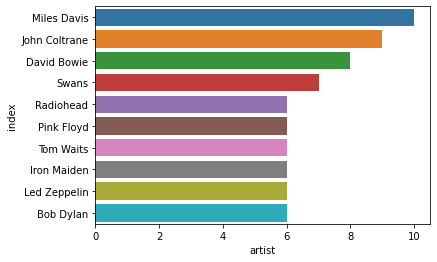

In [4]:
sns.barplot(y="index", x="artist", data=top_ten_artists)

In [7]:
df_teste = rym_df.groupby(["decade", "artist"]).agg({"avg_rating": np.mean})["avg_rating"].groupby("decade", group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()

In [8]:
df_teste.query("decade == 2010")

,decade,artist,avg_rating
674,2010,Kendrick Lamar,4.270000
675,2010,David Bowie,4.080000
676,2010,A Tribe Called Quest,4.000000
677,2010,Danny Brown,3.965000
678,2010,Death Grips,3.953333
679,2010,Ichiko Aoba 青葉市子,3.950000
680,2010,Sufjan Stevens,3.940000
681,2010,"Tyler, the Creator",3.935000
682,2010,D'Angelo and The Vanguard,3.930000
683,2010,Swans,3.926667


TODO: Formatar datas, primary and secondary genres and descriptors

In [54]:
rym_df["artist"].value_counts()[:10]

Miles Davis      15
Bob Dylan        13
John Coltrane    11
David Bowie      10
King Crimson      8
Swans             8
Led Zeppelin      8
Pink Floyd        7
Grateful Dead     7
Iron Maiden       7
Name: artist, dtype: int64

Precisamos ajeitar algumas colunas.

Para nosso propositos não precisaremos da data completa em que o album foi lançado, só vamos querer a década.

Para isso, podemos criar uma simples função que captura o padrão do ano (4 digitos seguidos) e aplica um pequeno truque pra obter a decada.

In [6]:
def date_to_decade(dt):
    year_pt = re.compile("\d{4}")
    year = int(year_pt.findall(dt)[0])
    decade = year // 10 * 10
    return decade

rym_df["decade"] = rym_df["release_date"].apply(date_to_decade)

In [7]:
rym_df.head()

,position,artist,album,release_date,primary_genres,secondary_genres,descriptors,number_ratings,number_reviews,avg_rating,id_spotify,decade
0,1,Radiohead,OK Computer,16 June 1997,"Alternative Rock, Art Rock",Space Rock Revival,"melancholic, anxious, futuristic, male vocals,...","76,616","1,564",4.24,7dxKtc08dYeRVHt3p9CZJn,1990
1,2,Kendrick Lamar,To Pimp a Butterfly,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry","political, conscious, concept album, poetic, p...","51,235",433,4.31,7ycBtnsMtyVbbwTfJwRjSP,2010
2,3,Pink Floyd,Wish You Were Here,12 September 1975,"Progressive Rock, Art Rock",Space Rock,"melancholic, atmospheric, progressive, male vo...","52,941","1,016",4.30,0bCAjiUamIFqKJsekOYuRw,1970
3,4,King Crimson,In the Court of the Crimson King,10 October 1969,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...","48,905",845,4.30,5wec5BciMpDMzlEFpYeHse,1960
4,5,Radiohead,Kid A,3 October 2000,"Art Rock, Experimental Rock, Electronic","Ambient, IDM, Electronic, Art Pop","cold, melancholic, futuristic, atmospheric, an...","63,660",765,4.23,19RUXBFyM4PpmrLRdtqWbp,2000


<AxesSubplot:xlabel='decade', ylabel='avg_rating'>

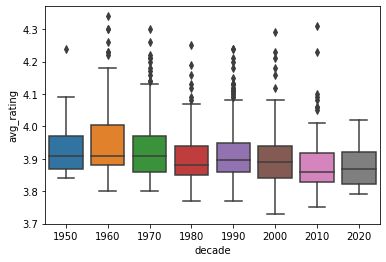

In [9]:
sns.boxplot(x="decade", y="avg_rating", data=rym_df)

In [10]:
rym_df.groupby(["decade"])["avg_rating"].agg(["mean", "std"])

,mean,std
decade,,
1950,3.936087,0.094952
1960,3.958000,0.114942
1970,3.933828,0.094898
1980,3.905612,0.082875
1990,3.920727,0.090717
2000,3.904755,0.092583
2010,3.889857,0.105960
2020,3.876429,0.065704


In [11]:
prim_genres = []
for pg in rym_df["primary_genres"]:
    pg_split = pg.split(", ")
    prim_genres += pg_split
prim_genres_freq = Counter(prim_genres)

In [15]:
?WordCloud

In [12]:
wc = WordCloud(background_color="white").generate_from_frequencies(prim_genres_freq)

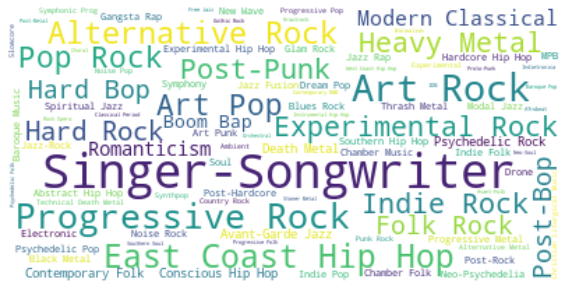

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [14]:
sec_genres = []
for sg in rym_df["secondary_genres"].dropna():
    sg_split = sg.split(", ")
    sec_genres += sg_split
sec_genres_freq = Counter(sec_genres)

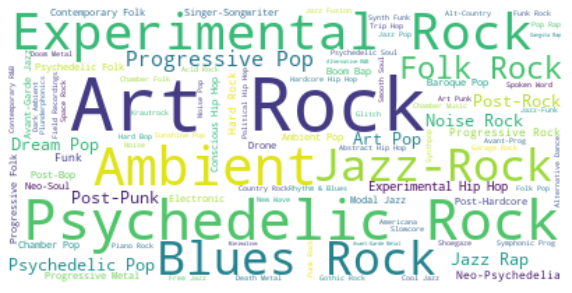

In [15]:
wc = WordCloud(background_color="white").generate_from_frequencies(sec_genres_freq)
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [16]:
dcs = []
for dc in rym_df["descriptors"].dropna():
    dc_split = dc.split(", ")
    dcs += dc_split
dcs_freq = Counter(dcs)

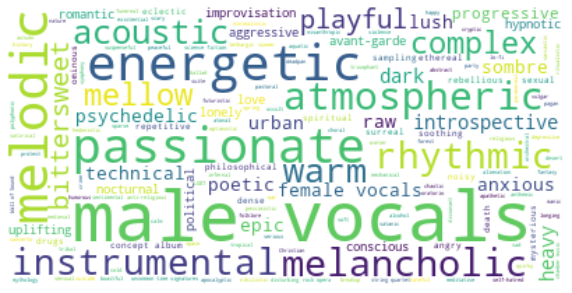

In [17]:
wc = WordCloud(background_color="white").generate_from_frequencies(dcs_freq)
fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")
plt.show()

In [116]:
list_of_genres = []
for g in rym_df["secondary_genres"].dropna():
    g_split = g.split(", ")
    list_of_genres += [g_strip.strip() for g_strip in g_split]

In [117]:
375 + 170 + 280

825

In [118]:
len(set(list_of_genres))

375

In [119]:
len(set(list_of_genres))

375

In [120]:
len(set(list_of_genres))

375

In [121]:
rym_df["secondary_genres"].value_counts()

Hard Rock                                                                           10
Progressive Metal                                                                    9
Blues Rock                                                                           8
Post-Punk                                                                            6
Folk Rock                                                                            6
                                                                                    ..
Acid Jazz, Psychedelic Rock                                                          1
Experimental Rock, Folk Rock, Psychedelic Pop, Neo-Psychedelia, Progressive Rock     1
Chamber Pop, Jazz Pop, Progressive Pop, J-Rock, Noise Pop                            1
Avant-Garde Jazz, Jazz-Funk, Experimental Big Band                                   1
Punk Rock, Noise Rock, Post-Hardcore                                                 1
Name: secondary_genres, Length: 702, dtype:

In [122]:
rym_df["artist"].value_counts()[:10]

Miles Davis      15
Bob Dylan        13
John Coltrane    11
David Bowie      10
King Crimson      8
Swans             8
Led Zeppelin      8
Pink Floyd        7
Grateful Dead     7
Iron Maiden       7
Name: artist, dtype: int64

In [123]:
teste = rym_df.copy()

In [126]:
teste["date"] = teste["release_date"].str.replace("Live", "").str.replace("Archival", "").str.strip()

In [127]:
teste["anos"] = teste["release_date"].str.extract(r"(\d{4})")

In [98]:
import numpy as np

In [112]:
1925//10*10

1920

In [128]:
teste

,position,artist,album,release_date,primary_genres,secondary_genres,descriptors,number_ratings,number_reviews,avg_rating,id_spotify,date,anos
0,1,Radiohead,OK Computer,16 June 1997,"Alternative Rock, Art Rock",Space Rock Revival,"melancholic, anxious, futuristic, male vocals,...","76,616","1,564",4.24,7dxKtc08dYeRVHt3p9CZJn,16 June 1997,1997
1,2,Kendrick Lamar,To Pimp a Butterfly,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","Political Hip Hop, Neo-Soul, Funk, Poetry","political, conscious, concept album, poetic, p...","51,235",433,4.31,7ycBtnsMtyVbbwTfJwRjSP,15 March 2015,2015
2,3,Pink Floyd,Wish You Were Here,12 September 1975,"Progressive Rock, Art Rock",Space Rock,"melancholic, atmospheric, progressive, male vo...","52,941","1,016",4.30,0bCAjiUamIFqKJsekOYuRw,12 September 1975,1975
3,4,King Crimson,In the Court of the Crimson King,10 October 1969,"Progressive Rock, Art Rock","Symphonic Prog, Jazz-Rock, Free Improvisation,...","fantasy, epic, progressive, complex, philosoph...","48,905",845,4.30,5wec5BciMpDMzlEFpYeHse,10 October 1969,1969
4,5,Radiohead,Kid A,3 October 2000,"Art Rock, Experimental Rock, Electronic","Ambient, IDM, Electronic, Art Pop","cold, melancholic, futuristic, atmospheric, an...","63,660",765,4.23,19RUXBFyM4PpmrLRdtqWbp,3 October 2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Klaus Schulze,"""X""",September 1978,Berlin School,"Ambient, Modern Classical","concept album, atmospheric, progressive, instr...","2,826",54,3.86,4M8LtVeYa55bP7jkKvFrx9,September 1978,1978
996,997,Iced Earth,Alive in Athens,19 July 1999 Live,"Power Metal, US Power Metal, Heavy Metal",Thrash Metal,"epic, heavy, mythology, energetic, male vocals","1,103",44,3.99,5f4Jvsa1R9W3oiEv6B9moT,19 July 1999,1999
997,998,Nirvana,Live at the Paramount,12 April 2019 Archival Live,Grunge,"Punk Rock, Noise Rock, Post-Hardcore","energetic, male vocals, heavy, raw, aggressive...",702,8,4.03,5A7qhg1w3J1GVoPPTChYCF,12 April 2019,2019
998,999,Ludwig van Beethoven / Berliner Philharmoniker...,Symphonie Nr. 7,1962,"Symphony, Romanticism",NaN,"symphony, instrumental, orchestral, acoustic, ...",445,NaN,3.89,2KSJA9WWEs5XtFORmIAdeU,1962,1962
